# 목차

- [중복 문장, subject_entity가 동일한 문장, object_entity가 동일한 문장](#1)
- [중복되는 문장의 라벨별 개수 확인](#2)
- [without_dup 데이터 라벨 분포](#3)
- [1000개 미만의 샘플들을 하나하나 확인해가며 증강 기법 고민](#4)
- [오답률이 높은 라벨 분석](#5)

In [12]:
import pandas as pd

In [30]:
train_df = pd.read_csv('../dataset/train.csv')

In [31]:
train_df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [79]:
clean_train_df = pd.read_csv('../dataset/clean_train.csv')

In [38]:
import ast

In [39]:
clean_train_df['subject_entity'] = clean_train_df['subject_entity'].apply(lambda x: ast.literal_eval(x)) # turn string formatted like dict into real dict
clean_train_df['object_entity'] = clean_train_df['object_entity'].apply(lambda x: ast.literal_eval(x))


clean_train_df['subject_entity'] = clean_train_df['subject_entity'].apply(lambda x: x['word'])
clean_train_df['object_entity'] = clean_train_df['object_entity'].apply(lambda x: x['word'])

In [80]:
clean_train_df.head()


,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [2]:
%%html
<a id="1"></a>

# 중복 문장, subject_entity가 동일한 문장, object_entity가 동일한 문장

In [81]:
# 중복 문장 확인
duplicate_sentence_counts = clean_train_df['sentence'].value_counts()
duplicate_sentences = duplicate_sentence_counts[duplicate_sentence_counts > 1].index

# 해당 문장들을 필터링하고 내림차순으로 정렬한 DataFrame 생성
result_df = clean_train_df[clean_train_df['sentence'].isin(duplicate_sentences)]
result_df['sentence_counts'] = result_df['sentence'].map(duplicate_sentence_counts)  # 등장 빈도 열 추가
result_df = result_df.sort_values(by=['sentence_counts', 'sentence'], ascending=[False, False]).drop(columns='sentence_counts')
result_df

/tmp/ipykernel_377579/721010232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['sentence_counts'] = result_df['sentence'].map(duplicate_sentence_counts)  # 등장 빈도 열 추가


,id,sentence,subject_entity,object_entity,label,source
9519,9524,"휘그당은 다시 윌리엄 헨리 해리슨을 대통령 후보로 지명하였고, 버지니아 주의 전 상...","{'word': '존 타일러', 'start_idx': 48, 'end_idx': ...","{'word': '휘그당', 'start_idx': 0, 'end_idx': 2, ...",per:employee_of,wikipedia
23927,23936,"휘그당은 다시 윌리엄 헨리 해리슨을 대통령 후보로 지명하였고, 버지니아 주의 전 상...","{'word': '윌리엄 헨리 해리슨', 'start_idx': 8, 'end_id...","{'word': '존 타일러', 'start_idx': 48, 'end_idx': ...",per:colleagues,wikipedia
30428,30438,"휘그당은 다시 윌리엄 헨리 해리슨을 대통령 후보로 지명하였고, 버지니아 주의 전 상...","{'word': '윌리엄 헨리 해리슨', 'start_idx': 8, 'end_id...","{'word': '휘그당', 'start_idx': 0, 'end_idx': 2, ...",per:employee_of,wikipedia
22732,22741,"홍무제의 손자이며, 영락제와 인효문황후 서씨(仁孝文皇后 徐氏)의 장남이다.","{'word': '영락제', 'start_idx': 11, 'end_idx': 13...","{'word': '홍무제', 'start_idx': 0, 'end_idx': 2, ...",per:parents,wikipedia
24078,24087,"홍무제의 손자이며, 영락제와 인효문황후 서씨(仁孝文皇后 徐氏)의 장남이다.","{'word': '영락제', 'start_idx': 11, 'end_idx': 13...","{'word': '인효문황후', 'start_idx': 16, 'end_idx': ...",per:spouse,wikipedia
...,...,...,...,...,...,...
32423,32434,"""탕약망""이란 예수회 선교사 천문학자 아담 샬의 중국 이름이다.","{'word': '아담 샬', 'start_idx': 21, 'end_idx': 2...","{'word': '예수회', 'start_idx': 8, 'end_idx': 10,...",per:employee_of,wikipedia
3586,3588,"""소이현, 인교진이 하는 광고는 괜찮고"", ""차 광고할 때 여자가 남자한테 하던 소...","{'word': '인교진', 'start_idx': 6, 'end_idx': 8, ...","{'word': '소이현', 'start_idx': 52, 'end_idx': 54...",no_relation,wikitree
28041,28051,"""소이현, 인교진이 하는 광고는 괜찮고"", ""차 광고할 때 여자가 남자한테 하던 소...","{'word': '소이현', 'start_idx': 52, 'end_idx': 54...","{'word': '인교진', 'start_idx': 6, 'end_idx': 8, ...",no_relation,wikitree
918,919,"""2006년 지방선거에 참패하고 민주당과 그 전신인 열린 우리당은 노 씨의 국정 운...","{'word': '열린 우리당', 'start_idx': 29, 'end_idx':...","{'word': '노무현', 'start_idx': 127, 'end_idx': 1...",no_relation,wikipedia


In [54]:
## sentence와 subject_entity가 동일한 샘플들을 추출

sentnece_sb_equal = result_df[result_df.duplicated(subset=['sentence','subject_entity'], keep=False)]
sentnece_sb_equal

,id,sentence,subject_entity,object_entity,label,source
23936,23936,"휘그당은 다시 윌리엄 헨리 해리슨을 대통령 후보로 지명하였고, 버지니아 주의 전 상...","{'word': '윌리엄 헨리 해리슨', 'start_idx': 8, 'end_id...","{'word': '존 타일러', 'start_idx': 48, 'end_idx': ...",per:colleagues,wikipedia
30438,30438,"휘그당은 다시 윌리엄 헨리 해리슨을 대통령 후보로 지명하였고, 버지니아 주의 전 상...","{'word': '윌리엄 헨리 해리슨', 'start_idx': 8, 'end_id...","{'word': '휘그당', 'start_idx': 0, 'end_idx': 2, ...",per:employee_of,wikipedia
22741,22741,"홍무제의 손자이며, 영락제와 인효문황후 서씨(仁孝文皇后 徐氏)의 장남이다.","{'word': '영락제', 'start_idx': 11, 'end_idx': 13...","{'word': '홍무제', 'start_idx': 0, 'end_idx': 2, ...",per:parents,wikipedia
24087,24087,"홍무제의 손자이며, 영락제와 인효문황후 서씨(仁孝文皇后 徐氏)의 장남이다.","{'word': '영락제', 'start_idx': 11, 'end_idx': 13...","{'word': '인효문황후', 'start_idx': 16, 'end_idx': ...",per:spouse,wikipedia
11740,11740,"해운대 구민들은 이구동성으로 ""처음부터 비리의 온상이자 엄청난 비리로 엘시티 게이트...","{'word': '허남식', 'start_idx': 172, 'end_idx': 1...","{'word': '서병수', 'start_idx': 167, 'end_idx': 1...",no_relation,wikitree
...,...,...,...,...,...,...
30843,30843,(사실 대부분의 배트맨의 적들은 한번 정도는 배트맨과 손을 잡고 일한 적이 있다. ...,"{'word': '배트맨', 'start_idx': 62, 'end_idx': 64...","{'word': '저스티스 리그', 'start_idx': 153, 'end_idx...",no_relation,wikipedia
10630,10630,'대리게임' 논란으로 비판을 받았던 정의당 비례대표 1번 류호정 후보가 입장을 밝혔다.,"{'word': '류호정', 'start_idx': 32, 'end_idx': 34...","{'word': '정의당', 'start_idx': 20, 'end_idx': 22...",per:employee_of,wikitree
21061,21061,'대리게임' 논란으로 비판을 받았던 정의당 비례대표 1번 류호정 후보가 입장을 밝혔다.,"{'word': '류호정', 'start_idx': 32, 'end_idx': 34...","{'word': '비례대표', 'start_idx': 24, 'end_idx': 2...",per:title,wikitree
919,919,"""2006년 지방선거에 참패하고 민주당과 그 전신인 열린 우리당은 노 씨의 국정 운...","{'word': '열린 우리당', 'start_idx': 29, 'end_idx':...","{'word': '노무현', 'start_idx': 127, 'end_idx': 1...",no_relation,wikipedia


In [55]:
## sentence와 object_entity가 동일한 샘플들을 추출

sentnece_ob_equal = result_df[result_df.duplicated(subset=['sentence','object_entity'], keep=False)]
sentnece_ob_equal

,id,sentence,subject_entity,object_entity,label,source
9524,9524,"휘그당은 다시 윌리엄 헨리 해리슨을 대통령 후보로 지명하였고, 버지니아 주의 전 상...","{'word': '존 타일러', 'start_idx': 48, 'end_idx': ...","{'word': '휘그당', 'start_idx': 0, 'end_idx': 2, ...",per:employee_of,wikipedia
30438,30438,"휘그당은 다시 윌리엄 헨리 해리슨을 대통령 후보로 지명하였고, 버지니아 주의 전 상...","{'word': '윌리엄 헨리 해리슨', 'start_idx': 8, 'end_id...","{'word': '휘그당', 'start_idx': 0, 'end_idx': 2, ...",per:employee_of,wikipedia
4031,4031,해체 이후 마리노스로의 흡수 합병에 반발하던 서포터들은 독자적으로 요코하마 FC를 ...,"{'word': '요코하마 FC', 'start_idx': 37, 'end_idx'...","{'word': 'J2리그', 'start_idx': 71, 'end_idx': 7...",no_relation,wikipedia
26864,26864,해체 이후 마리노스로의 흡수 합병에 반발하던 서포터들은 독자적으로 요코하마 FC를 ...,"{'word': 'J1리그', 'start_idx': 81, 'end_idx': 8...","{'word': 'J2리그', 'start_idx': 71, 'end_idx': 7...",org:members,wikipedia
5648,5648,"해운대 구민들은 이구동성으로 ""처음부터 비리의 온상이자 엄청난 비리로 엘시티 게이트...","{'word': '박근혜', 'start_idx': 96, 'end_idx': 98...","{'word': '자유한국당', 'start_idx': 153, 'end_idx':...",no_relation,wikitree
...,...,...,...,...,...,...
13135,13135,'파파라치'라는 이름은 이탈리아의 영화감독 페데리코 펠리니가 만든 《달콤한 생활》에...,"{'word': '펠리니', 'start_idx': 29, 'end_idx': 31...","{'word': '이탈리아', 'start_idx': 13, 'end_idx': 1...",per:origin,wikipedia
16566,16566,"'Project Fairy(프로젝트 페어리)'라는 유닛명으로 가나하 히비키, 시죠 ...","{'word': '시죠 타카네', 'start_idx': 43, 'end_idx':...","{'word': '프로젝트 페어리', 'start_idx': 15, 'end_idx...",per:employee_of,wikipedia
23316,23316,"'Project Fairy(프로젝트 페어리)'라는 유닛명으로 가나하 히비키, 시죠 ...","{'word': '가나하 히비키', 'start_idx': 34, 'end_idx'...","{'word': '프로젝트 페어리', 'start_idx': 15, 'end_idx...",per:employee_of,wikipedia
19427,19427,"""탕약망""이란 예수회 선교사 천문학자 아담 샬의 중국 이름이다.","{'word': '탕약망', 'start_idx': 1, 'end_idx': 3, ...","{'word': '예수회', 'start_idx': 8, 'end_idx': 10,...",per:employee_of,wikipedia


In [3]:
%%html
<a id="2"></a>

# 중복되는 문장의 라벨별 개수 확인

In [82]:
# 라벨별 개수 확인

sentnece_sb_equal['label'].value_counts()

label
no_relation                            740
per:date_of_birth                      281
per:employee_of                        231
per:title                              221
per:date_of_death                      147
per:origin                             111
per:alternate_names                     96
org:top_members/employees               90
org:member_of                           81
per:parents                             70
org:place_of_headquarters               53
org:alternate_names                     52
per:children                            47
per:spouse                              40
per:colleagues                          39
org:founded                             39
per:place_of_birth                      33
per:siblings                            20
org:members                             20
per:place_of_residence                  20
per:other_family                        15
org:product                             15
per:product                             12
org:f

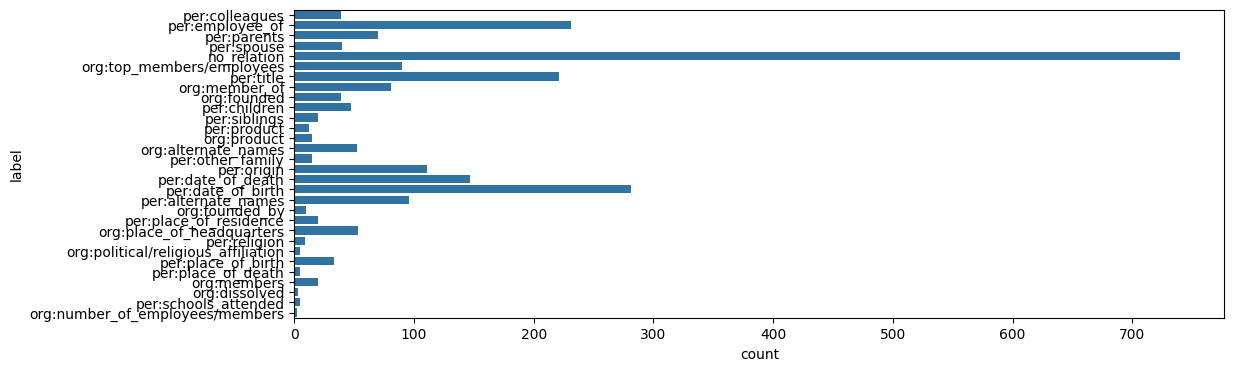

In [59]:
# 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.countplot(data=sentnece_sb_equal, y='label')
plt.show()

In [6]:
%%html
<a id="3"></a>

# without_dup 데이터 라벨 분포

In [62]:
# without_dup 데이터 라벨별 개수 확인

# 데이터 불러오기
train_without_dup = pd.read_csv('../dataset/without_dup_train.csv')
dev_without_dup = pd.read_csv('../dataset/without_dup_dev.csv')

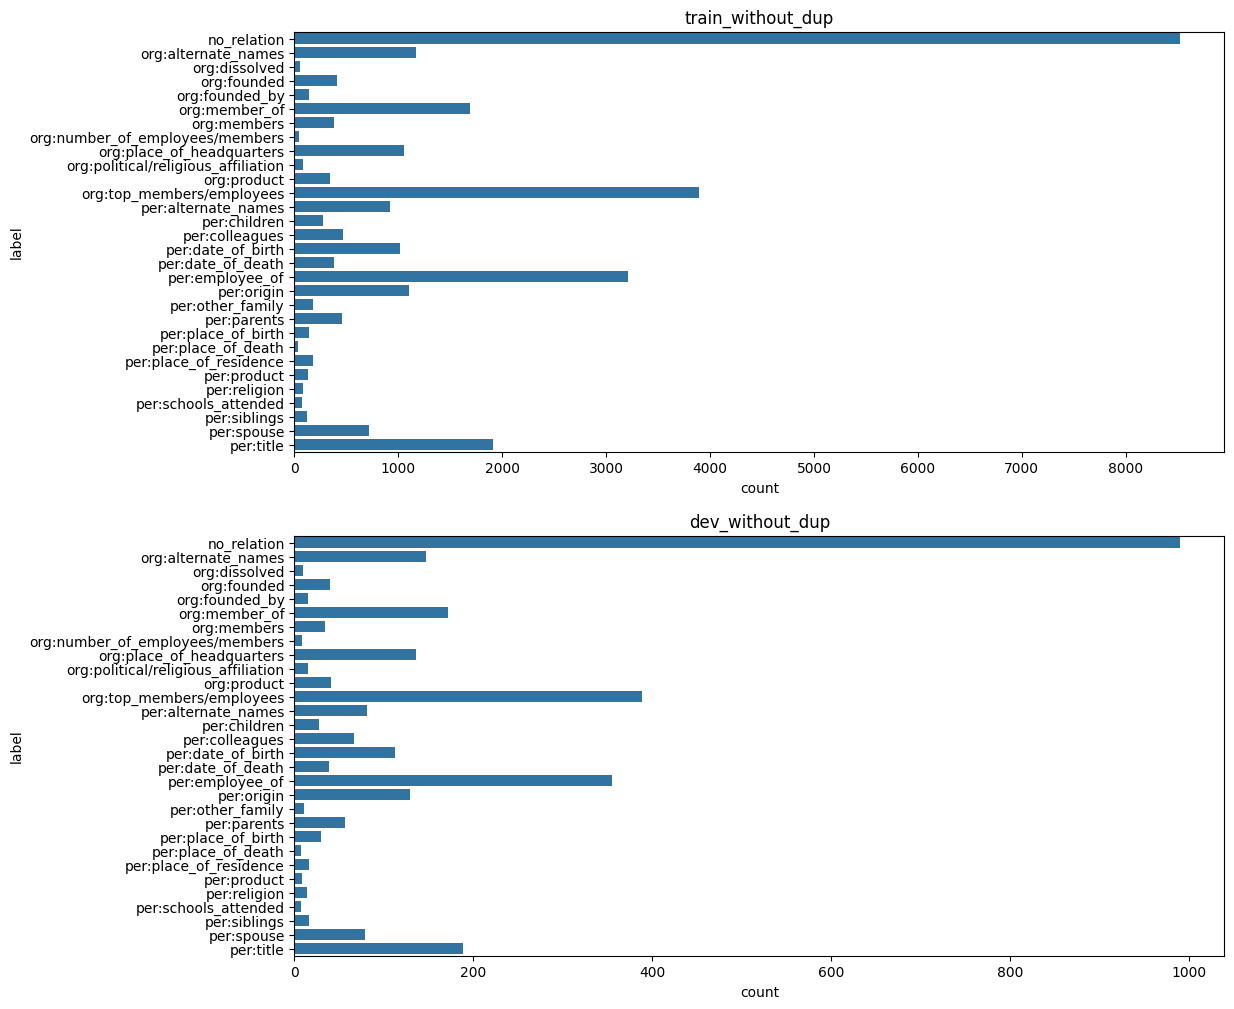

In [78]:
# 라벨별 개수 확인

train_without_dup['label'].value_counts()
dev_without_dup['label'].value_counts()

# 시각화

plt.figure(figsize=(12, 12))


plt.subplot(2, 1, 1)
sns.countplot(data=train_without_dup.sort_values('label'), y='label')
plt.title('train_without_dup')

plt.subplot(2, 1, 2)
sns.countplot(data=dev_without_dup.sort_values('label'), y='label')
plt.title('dev_without_dup')

plt.show()


In [7]:
%%html
<a id="4"></a>

# 1000개 미만의 샘플들을 하나하나 확인해가며 증강 기법 고민

In [89]:
# 라벨별 개수 확인

clean_train_df = pd.read_csv('../dataset/clean_train.csv')

clean_train_df['label'].value_counts()

label
no_relation                            9529
org:top_members/employees              4283
per:employee_of                        3573
per:title                              2102
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1194
per:date_of_birth                      1130
per:alternate_names                    1000
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             419
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  192
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product               

In [96]:
# 1000개 이하의 라벨 추출, 총 20개
clean_train_df['label'].value_counts()[clean_train_df['label'].value_counts() < 1000]

label
per:spouse                             795
per:colleagues                         534
per:parents                            520
org:founded                            450
org:members                            419
per:date_of_death                      418
org:product                            380
per:children                           304
per:place_of_residence                 192
per:other_family                       190
per:place_of_birth                     166
org:founded_by                         155
per:product                            139
per:siblings                           136
org:political/religious_affiliation     98
per:religion                            96
per:schools_attended                    82
org:dissolved                           66
org:number_of_employees/members         48
per:place_of_death                      40
Name: count, dtype: int64

### per:place_of_death [40개]

In [97]:
# per:place_of_death 데이터 확인

clean_train_df[clean_train_df['label'] == 'per:place_of_death']

,id,sentence,subject_entity,object_entity,label,source
1043,1044,"2010년 3월 29일, 최진영은 서울특별시 강남구 논현동의 자택에서 스스로 세상을...","{'word': '최진영', 'start_idx': 14, 'end_idx': 16...","{'word': '서울특별시 강남구', 'start_idx': 19, 'end_id...",per:place_of_death,wikipedia
1551,1552,"막시밀리아노 1세(Maximiliano I, 1832년 7월 6일 오스트리아 빈 ~...","{'word': '막시밀리아노 1세', 'start_idx': 0, 'end_idx...","{'word': '멕시코 케레타로', 'start_idx': 60, 'end_idx...",per:place_of_death,wikipedia
2213,2214,을미사변 때 훈련대 병력을 동원하여 명성황후를 시해하는 데 동참했던 당시 조선훈련대...,"{'word': '우범선', 'start_idx': 205, 'end_idx': 2...","{'word': '일본 히로시마현 구레', 'start_idx': 176, 'end...",per:place_of_death,wikipedia
2801,2802,마리 드 메디시스 왕비는 1630년 그녀의 아들이었던 루이 13세에 의해 추방당하게...,"{'word': '마리 드 메디시스', 'start_idx': 0, 'end_idx...","{'word': '쾰른', 'start_idx': 71, 'end_idx': 72,...",per:place_of_death,wikipedia
3508,3510,1921년 6월 자유시참변(自由市慘變) 발생 후 상해파 고려공산당의 간부들이 거의 ...,"{'word': '김립', 'start_idx': 161, 'end_idx': 16...","{'word': '상하이', 'start_idx': 181, 'end_idx': 1...",per:place_of_death,wikipedia
4169,4171,병을 얻은 트라야누스는 하드리아누스를 대신 파르티아 원정군의 사령관으로 임명하고 로...,"{'word': '트라야누스', 'start_idx': 6, 'end_idx': 1...","{'word': '세리누스', 'start_idx': 69, 'end_idx': 7...",per:place_of_death,wikipedia
4418,4421,김창완과 그의 두 형제들로 구성되었던 그룹 산울림의 멤버이자 3형제 중 막내였던 김...,"{'word': '김창익', 'start_idx': 45, 'end_idx': 47...","{'word': '캐나다 벤쿠버', 'start_idx': 59, 'end_idx'...",per:place_of_death,wikipedia
4946,4949,"루이스 몰로니 아르벨로(; 1925년 5월 12일, 카나리아 제도 산타 크루스 데 ...","{'word': '루이스 몰로니', 'start_idx': 0, 'end_idx':...","{'word': '라스 팔마스', 'start_idx': 75, 'end_idx':...",per:place_of_death,wikipedia
7225,7229,"고용희는 2004년 8월 13일 프랑스 파리에서 치료 중, 심장마비, 암으로 사망했...","{'word': '고용희', 'start_idx': 0, 'end_idx': 2, ...","{'word': '프랑스', 'start_idx': 18, 'end_idx': 20...",per:place_of_death,wikipedia
7436,7440,"2010년 폴란드 공군 Tu-154 추락사고는 2010년 4월 10일, 폴란드의 레...","{'word': '레흐 카친스키', 'start_idx': 45, 'end_idx'...","{'word': '러시아 스몰렌스크', 'start_idx': 88, 'end_id...",per:place_of_death,wikipedia


In [9]:
%%html
<a id="5"></a>

# 오답률이 높은 라벨 정성 분석

### tapt_roberta-larget_config.json 모델의 오답률
- 오답률은 dhs_error_rate.ipynb에서 확인 가능

오답률 0.4 이상인 라벨

11.	per:place_of_residence : 0.937500
13.	per:other_family : 0.818182
8.	per:product	: 0.750000
2.	org:members	: 0.470588

In [13]:
clean_train_df = pd.read_csv('../dataset/clean_train.csv')

### per:place_of_residence 오답률 1위 0.9375 : 라벨 개수 192 -> 데이터가 매우 부족한 라벨

In [14]:
clean_train_df[clean_train_df['label'] == 'per:place_of_residence']

,id,sentence,subject_entity,object_entity,label,source
167,167,이어 “6월 항쟁의 미완성을 통해 민주주의 후퇴를 겪었다. 국민들이 촛불혁명으로 탄...,"{'word': '문재인', 'start_idx': 50, 'end_idx': 52...","{'word': '대한민국', 'start_idx': 83, 'end_idx': 8...",per:place_of_residence,wikitree
230,230,다만 역법의 시작을 이슬람력과 동일하게 무함마드 및 그의 추종자들이 메카에서 메디나...,"{'word': '무함마드', 'start_idx': 22, 'end_idx': 2...","{'word': '메디나', 'start_idx': 43, 'end_idx': 45...",per:place_of_residence,wikipedia
233,233,"유한굉(劉漢宏, Liu Hanhong, ~ 887년)은 중국 당나라 말기에 활약했던...","{'word': '유한굉', 'start_idx': 0, 'end_idx': 2, ...","{'word': '중국 당나라', 'start_idx': 31, 'end_idx':...",per:place_of_residence,wikipedia
314,315,전쟁은 일본이 개항하면서 에도 막부(도쿠가와 막부)의 이이 나오스케(히코네 번)가 ...,"{'word': '이이 나오스케', 'start_idx': 30, 'end_idx'...","{'word': '히코네 번', 'start_idx': 38, 'end_idx': ...",per:place_of_residence,wikipedia
502,503,김성주(1990년 11월 15일 ~)은 대한민국의 축구 선수이며 현재 K리그1 인천...,"{'word': '김성주', 'start_idx': 0, 'end_idx': 2, ...","{'word': '대한민국', 'start_idx': 22, 'end_idx': 2...",per:place_of_residence,wikipedia
...,...,...,...,...,...,...
31904,31914,"대구광역시에서는 전 지역에서 홍준표가 앞섰는데, 유승민 후보의 거점 지역 동구, 한...","{'word': '김부겸', 'start_idx': 73, 'end_idx': 75...","{'word': '대구광역시', 'start_idx': 0, 'end_idx': 4...",per:place_of_residence,wikipedia
31965,31975,"유력자의 협력 하에 필리핀 헌법을 만들고, 호세 라우렐을 대통령으로 내세워 일본에 ...","{'word': '호세 라우렐', 'start_idx': 24, 'end_idx':...","{'word': '필리핀', 'start_idx': 11, 'end_idx': 13...",per:place_of_residence,wikipedia
32117,32127,"또 더불어민주당 조승래(대전 유성갑) 의원이 12건(12.3%), 더불어민주당 김해...","{'word': '김해영', 'start_idx': 44, 'end_idx': 46...","{'word': '부산 연제구', 'start_idx': 48, 'end_idx':...",per:place_of_residence,wikitree
32121,32131,"한편, 김헌창(金憲昌)이 822년 3월에 반란을 일으켜, 웅진(熊津)을 수도로 하고...","{'word': '김헌창', 'start_idx': 4, 'end_idx': 6, ...","{'word': '웅진(熊津)', 'start_idx': 32, 'end_idx':...",per:place_of_residence,wikipedia


- 원인 분석
    - 그렇게 어려운 문제처럼 보이지는 않는다
    - 데이터가 부족해서 그런 듯

-> POS 태깅을 통해 인명과, 장소가 나오는 sentence를 추출해서 데이터 증강이 가능해 보임

### per:other_family 오답률 2위 0.8181 : 라벨 개수 190 -> 데이터가 매우 부족한 라벨

In [16]:
clean_train_df[clean_train_df['label'] == 'per:other_family']

,id,sentence,subject_entity,object_entity,label,source
199,199,그러나 빅토리아가 태어난 지 1년 만에 에드워드는 사망했고 그녀는 말도 통하지 않는...,"{'word': '윌리엄 4세', 'start_idx': 70, 'end_idx':...","{'word': '빅토리아', 'start_idx': 4, 'end_idx': 7,...",per:other_family,wikipedia
636,637,기젤라의 언니 마틸다 폰 슈바벤은 케른텐 공작 콘라트 1세와 결혼하여 후일 콘라트 ...,"{'word': '콘라트 2세', 'start_idx': 65, 'end_idx':...","{'word': '기젤라', 'start_idx': 0, 'end_idx': 2, ...",per:other_family,wikipedia
682,683,"선덕여왕이 죽은 뒤 왕위가 사촌동생인 진덕여왕에게 돌아가는 점으로 보아, 선덕여왕보...","{'word': '진덕여왕', 'start_idx': 21, 'end_idx': 2...","{'word': '선덕여왕', 'start_idx': 0, 'end_idx': 3,...",per:other_family,wikipedia
783,784,왕실의 이중 인척으로 아버지 신숙주의 서녀이자 서모 배씨 소생의 이복여동생은 세조의...,"{'word': '신숙주', 'start_idx': 16, 'end_idx': 18...","{'word': '고령군', 'start_idx': 66, 'end_idx': 68...",per:other_family,wikipedia
871,872,광기 전쟁이라고도 불린 프랑수아 2세와 프랑스의 왕 샤를 8세 간 제2차 전쟁의 끝...,"{'word': '안 드 브르타뉴', 'start_idx': 58, 'end_idx...","{'word': '프랑수아 2세', 'start_idx': 13, 'end_idx'...",per:other_family,wikipedia
...,...,...,...,...,...,...
31765,31775,"소성왕, 헌덕왕, 흥덕왕의 동생이며, 애장왕의 숙부였다.","{'word': '애장왕', 'start_idx': 21, 'end_idx': 23...","{'word': '소성왕', 'start_idx': 0, 'end_idx': 2, ...",per:other_family,wikipedia
32309,32320,"칭기즈 칸의 씨족인 보르지긴은 황금씨족(알탄 우룩)이라 불리며, 영지 백성(우르스)...","{'word': '칭기즈 칸', 'start_idx': 0, 'end_idx': 4...","{'word': '보르지긴', 'start_idx': 11, 'end_idx': 1...",per:other_family,wikipedia
32348,32359,"스코 천황은 1398년 세상을 떠났고 30년 후인 1428년, 그의 종손 히코히토 ...","{'word': '쇼코 천황', 'start_idx': 50, 'end_idx': ...","{'word': '고하나조노 천황', 'start_idx': 62, 'end_idx...",per:other_family,wikipedia
32409,32420,"그러나 김양상의 친형제로 보기는 어렵고 사촌형제라고 보기도 어려운데, 이는 삼국사기...","{'word': '원성왕', 'start_idx': 63, 'end_idx': 65...","{'word': '선덕왕', 'start_idx': 72, 'end_idx': 74...",per:other_family,wikipedia


- 원인 분석
    - 문맥을 이해야해하는 문제이므로 어려운 문제에 해당한다고 생각
    - 데이터가 부족하기도 하고, 가족이라고 판단하는 근거로 사용하는 '외삼촌, 언니, 사촌동생 등' 이런 토큰을 주의깊게 봐야할 필요가 있음

-> '외삼촌, 언니, 사촌동생 등' 이런 토큰 주변에 special token을 추가하던가, attention에 가중치를 주던가

### per:product 오답률 3위 0.7500 : 라벨 개수 139 -> 데이터가 매우 부족한 라벨

In [17]:
clean_train_df[clean_train_df['label'] == 'per:product']

,id,sentence,subject_entity,object_entity,label,source
702,703,밴드는 마이클 잭슨의 《Thriller》 음반 제작을 돕고 같은 해 시카고의 컴백 ...,"{'word': '마이클 잭슨', 'start_idx': 4, 'end_idx': ...","{'word': 'Thriller', 'start_idx': 13, 'end_idx...",per:product,wikipedia
722,723,《스페이스워!》는 1962년 미국 MIT 학생이었던 스티브 러셀이 만든 세계 최초의...,"{'word': '스티브 러셀', 'start_idx': 29, 'end_idx':...","{'word': '스페이스워!', 'start_idx': 1, 'end_idx': ...",per:product,wikipedia
792,793,"KBS 드라마운영팀의 정성효 팀장의 인터뷰에서, ""국내 제작 드라마인 '꽃보다 남자...","{'word': '가미오 요코', 'start_idx': 107, 'end_idx'...","{'word': '꽃보다 남자', 'start_idx': 40, 'end_idx':...",per:product,wikipedia
822,823,후지코 후지오 Ⓐ에 따르면 후지코 F. 후지오는 도라에몽의 캐릭터를 만들 때 고양이...,"{'word': '후지코 F. 후지오', 'start_idx': 15, 'end_i...","{'word': '도라에몽', 'start_idx': 27, 'end_idx': 3...",per:product,wikipedia
902,903,《우리들의 일그러진 영웅》(- 英雄)은 이문열의 소설 《우리들의 일그러진 영웅》을 ...,"{'word': '이문열', 'start_idx': 22, 'end_idx': 24...","{'word': '우리들의 일그러진 영웅', 'start_idx': 1, 'end_...",per:product,wikipedia
...,...,...,...,...,...,...
30923,30933,러버 덕의 제작자 플로렌타인 호프만은 2001년 박물관에서 옛 도시를 그린 풍경화를...,"{'word': '플로렌타인 호프만', 'start_idx': 10, 'end_id...","{'word': '러버 덕', 'start_idx': 0, 'end_idx': 3,...",per:product,wikipedia
31836,31846,"신해철은 넥스트 컴백 앨범을 ""The Return Of N.EX.T""라는 이름의 더...","{'word': '신해철', 'start_idx': 0, 'end_idx': 2, ...","{'word': 'N.EX.T', 'start_idx': 31, 'end_idx':...",per:product,wikipedia
32054,32064,"그 뒤 생애를 마칠 때까지 다르질링에서 거주했으며, 본인의 집을 '라사 빌라(Lha...","{'word': '헬레나 블라바츠키', 'start_idx': 111, 'end_i...","{'word': '신지학협회', 'start_idx': 99, 'end_idx': ...",per:product,wikipedia
32210,32220,"그러나 서울에서 계속 재수 생활을 이어갈 만큼의 형편이 못되었기 때문에, 이후 경희...","{'word': '조영식', 'start_idx': 69, 'end_idx': 71...","{'word': '경희대학교', 'start_idx': 44, 'end_idx': ...",per:product,wikipedia


- 원인 분석
    - 문맥을 이해야해하는 문제이므로 어려운 문제에 해당한다고 생각
    - 데이터가 부족하기도 하고, 특정한 token에 가중치를주기도 어려운 문제

-> 데이터 증강이 가장 쉬워보임

### org:members 오답률 4위 0.4705 : 라벨 개수 419 -> 데이터가 부족한 라벨

In [18]:
clean_train_df[clean_train_df['label'] == 'org:members']

,id,sentence,subject_entity,object_entity,label,source
13,13,뉴질랜드 1차산업부 생물보안 대변인 캐서린 더시 박사는 과일파리를 잡기 위해 오클랜...,"{'word': '뉴질랜드', 'start_idx': 0, 'end_idx': 3,...","{'word': '오클랜드', 'start_idx': 43, 'end_idx': 4...",org:members,wikitree
47,47,"반민특위는 조사를 담당하는 특별조사위원회, 기소 및 송치 업무를 담당하는 특별검찰,...","{'word': '반민특위', 'start_idx': 0, 'end_idx': 3,...","{'word': '특별조사위원회', 'start_idx': 15, 'end_idx'...",org:members,wikipedia
135,135,"한편, 러시아의 경우에도 러시아 측의 조치로 인해 올 3월부터 인천-모스크바 간 정...","{'word': '러시아', 'start_idx': 14, 'end_idx': 16...","{'word': '모스크바', 'start_idx': 38, 'end_idx': 4...",org:members,policy_briefing
285,286,한편 경상남도의 저상버스 도입과 관련하여 창원시에서는 적극적으로 추진하려 했지만 마...,"{'word': '경상남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '창원시', 'start_idx': 23, 'end_idx': 25...",org:members,wikipedia
325,326,그는 “현대모비스는 약점으로 지적되어 왔던 높은 현대차 그룹 의존도 점차 낮아지고 ...,"{'word': '현대차 그룹', 'start_idx': 27, 'end_idx':...","{'word': '현대모비스', 'start_idx': 4, 'end_idx': 8...",org:members,wikitree
...,...,...,...,...,...,...
32340,32351,또한 “올해 내 수주를 기대하고 있는 프로젝트로는 알제리 HMD를 비롯해 말레이시아...,"{'word': '멕시코', 'start_idx': 162, 'end_idx': 1...","{'word': 'PEMEX', 'start_idx': 166, 'end_idx':...",org:members,wikitree
32398,32409,중세 세르비아 공국의 수도였던 스타리라스(Stari Ras)가 사라진 뒤에 설립된 ...,"{'word': '중세 세르비아 공국', 'start_idx': 0, 'end_id...","{'word': '스타리라스', 'start_idx': 17, 'end_idx': ...",org:members,wikipedia
32402,32413,미래통합당 비례대표용 위성정당인 미래한국당이 10일 비례대표 공천 신청자 명단을 발...,"{'word': '미래통합당', 'start_idx': 0, 'end_idx': 4...","{'word': '미래한국당', 'start_idx': 18, 'end_idx': ...",org:members,wikitree
32411,32422,이어 16일 스페인 바스크 자치정부의 이니고 우를클루 주지사를 만나 폐광으로 침체됐...,"{'word': '바스크', 'start_idx': 11, 'end_idx': 13...","{'word': '빌바오', 'start_idx': 48, 'end_idx': 50...",org:members,wikitree


- 원인 분석
    - org의 members를 찾아야 하는 꽤나 쉬워보이는 문제처럼 보이기도 함
    - 데이터가 부족

-> 이것 또한 POS 태그를 통해 찾아낸 org와 person으로 데이터 증강이 가능해보임